In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None

# CDD-CESM



This dataset is an Egyptian dataset composed of 2006 images IN TOTAL, composed of low-energy and constrast-enhanced spectral mamography, aka dual energy.

- 1003 low-energy images
- 1003 CESM

The number of patients is 326. Usually one patient has 8 images:
- 4 images per modality
    - 2 lateralities (L, R) and 2 views (CC, MLO)

Nevertheless, there are some exceptions so the number of total images is not the total hypothetic maximum 2068.

Besides the images we have:
- ROI of the findings: coordinates of the geometrical figure (ellipse, poligon, etc.)
- Biopsy results: benign, malignant.
- finding type: mass, asymmetry, 

## Can CCD-CESM be combined with the INCan DE dataset?
The project should be able to go by itself (no need of additional dataset) but it could be a nice addition to have another underrepresented population (mexican) in the study.

### Similarities
- Both dataset are, in theory, from the <u> same clincial protocol</u>, so it should be possible.
- Both datasets contain handmade ROI segmentations of the findings.
    - Which findings?
- Both dataset seem to have the presubstraction images UNREGISTERED.
    - Important to kepe in mind when using the ROI coordinates.

# Differences
- The mexican dataset have the raw images available, so all the original pixel intensities are available. The egyptian dataset has the images already preprocessed to 8bits.
- The egyptian dataset has black background, therefore has send the negative pixel intensities into a special value (zero?), or map inverselly towards 255. In any case, the images seem to be only showing the contrast-uptake, which is essential for detection.

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd

# Annotations

- We have annotations for basically all patients,and both modalities!<br>
    It is important to remember that not all annotations are from masses so probably the number of images to be used will be less than the total number of images...

In [26]:
im_dir = repo_path / 'data/CDD-CESM/images'
# metadata
metadata_path = repo_path / 'data/CDD-CESM/metadata/Radiology_manual_annotations.xlsx'
annotations_path = repo_path / 'data/CDD-CESM/metadata/Radiology_hand_drawn_segmentations_v2.csv'
metadata = pd.read_excel(metadata_path)
annotations = pd.read_csv(annotations_path)

In [30]:
annotations

,#filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,P1_L_CM_MLO.jpg,939216,{},1,0,"{""name"":""polygon"",""all_points_x"":[350,423,1005...",{}
1,P1_L_DM_MLO.jpg,646195,{},1,0,"{""name"":""polygon"",""all_points_x"":[353,413,1033...",{}
2,P2_L_CM_CC.jpg,302172,{},1,0,"{""name"":""polygon"",""all_points_x"":[550,533,412,...",{}
3,P2_L_CM_MLO.jpg,348629,{},1,0,"{""name"":""polygon"",""all_points_x"":[26,954,945,8...",{}
4,P2_L_DM_CC.jpg,572664,{},4,0,"{""name"":""polygon"",""all_points_x"":[4,107,349,49...",{}
...,...,...,...,...,...,...,...
2966,P326_L_CM_MLO.jpg,1376383,{},1,0,"{""name"":""polygon"",""all_points_x"":[1161,1161,11...",{}
2967,P326_L_DM_CC.jpg,881072,{},1,0,"{""name"":""polygon"",""all_points_x"":[37,60,82,90,...",{}
2968,P326_L_DM_MLO.jpg,798958,{},1,0,"{""name"":""polygon"",""all_points_x"":[1153,1153,11...",{}
2969,P326_R_DM_CC.jpg,897422,{},1,0,"{""name"":""ellipse"",""cx"":865,""cy"":618,""rx"":12,""r...",{}


In [21]:
example = 0
pat_example = metadata.iloc[example]
print(pat_example)

if 'DM' in pat_example.Image_name:
    im_path = im_dir / 'low-energy' / pat_example.Image_name
elif 'CM' in pat_example.Image_name:
    im_path = im_dir / 'substracted' / pat_example.Image_name

im_path = im_path.with_suffix('.jpg')

Image_name                                           P1_L_DM_MLO
Patient_ID                                                     1
Side                                                           L
Type                                                          DM
Age                                                           46
Breast density (ACR)                                           C
BIRADS                                                         4
Findings                               Architectural distortion 
View                                                         MLO
Tags                                      suspicious, distortion
Machine                                                        1
Pathology Classification/ Follow up                    Malignant
Name: 0, dtype: object


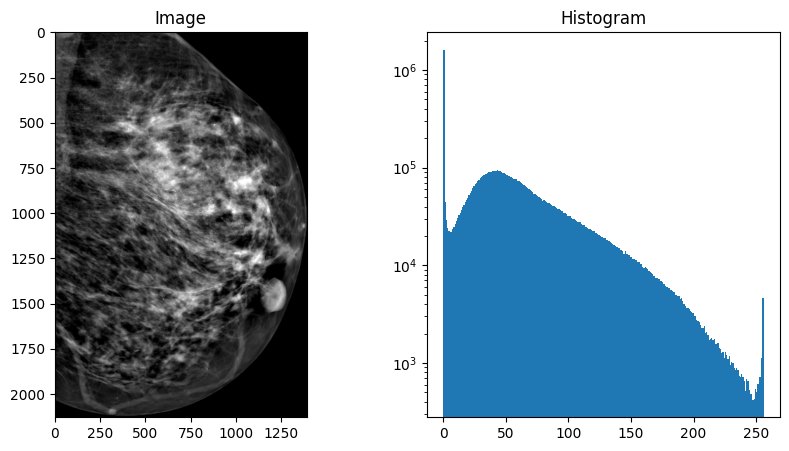

In [24]:
# read examaple
image = cv.imread(str(im_path))
# plot image and histogram
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image)
ax[0].set_title('Image')
ax[1].hist(image.ravel(),256,[0,256], log=True)
ax[1].set_title('Histogram')
plt.show()